In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

from sklearn.linear_model import LinearRegression
import pickle


In [8]:
# Load data from CSV
df = pd.read_csv('Area_Price.csv')


In [10]:
# Display first few rows of the dataframe
print(df.head())

   Area     Price
0  7420  13300000
1  8960  12250000
2  9960  12250000
3  7500  12215000
4  7420  11410000


In [12]:
# Check for any missing values
print(df.isnull().sum())


Area     0
Price    0
dtype: int64


In [14]:
# Summary statistics
print(df.describe())

               Area         Price
count    545.000000  5.450000e+02
mean    5150.541284  4.766729e+06
std     2170.141023  1.870440e+06
min     1650.000000  1.750000e+06
25%     3600.000000  3.430000e+06
50%     4600.000000  4.340000e+06
75%     6360.000000  5.740000e+06
max    16200.000000  1.330000e+07


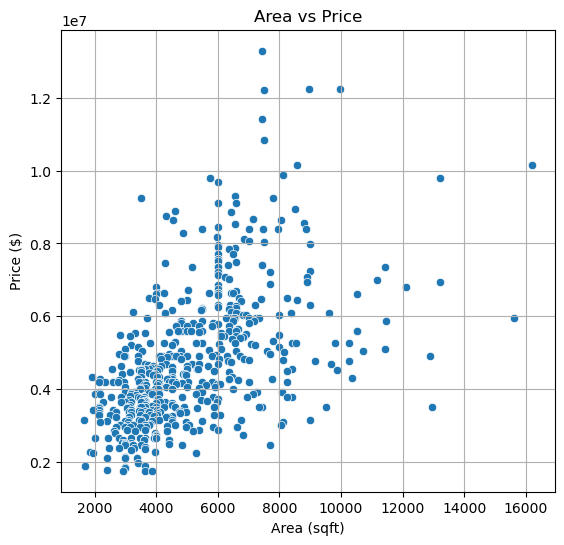

In [16]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Area vs Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price ($)')
plt.grid(True)


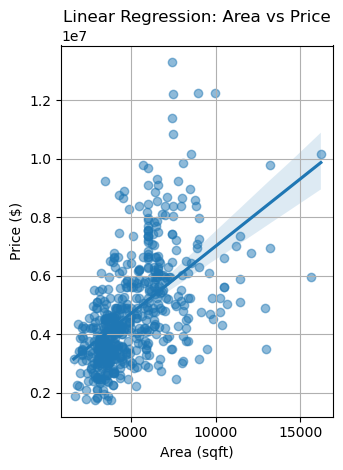

In [18]:
plt.subplot(1, 2, 2)
sns.regplot(x='Area', y='Price', data=df, scatter_kws={'alpha':0.5})
plt.title('Linear Regression: Area vs Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

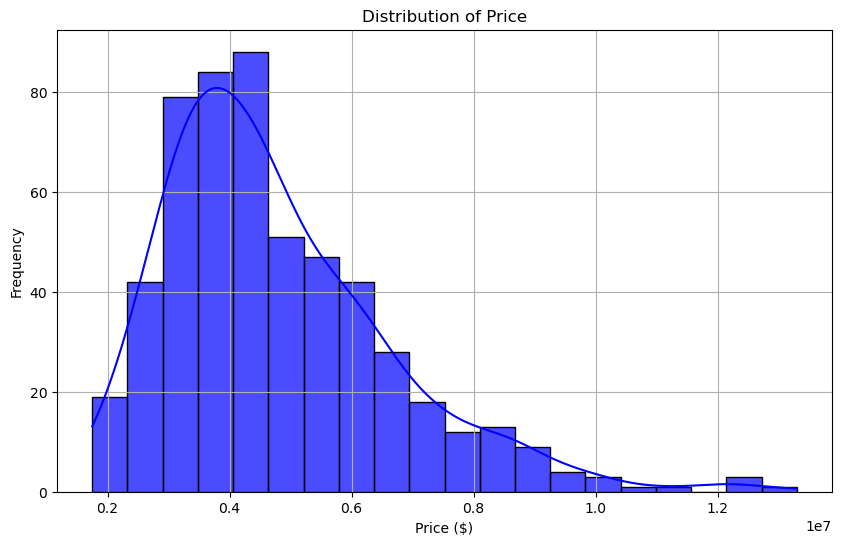

In [20]:
# Distribution plot of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

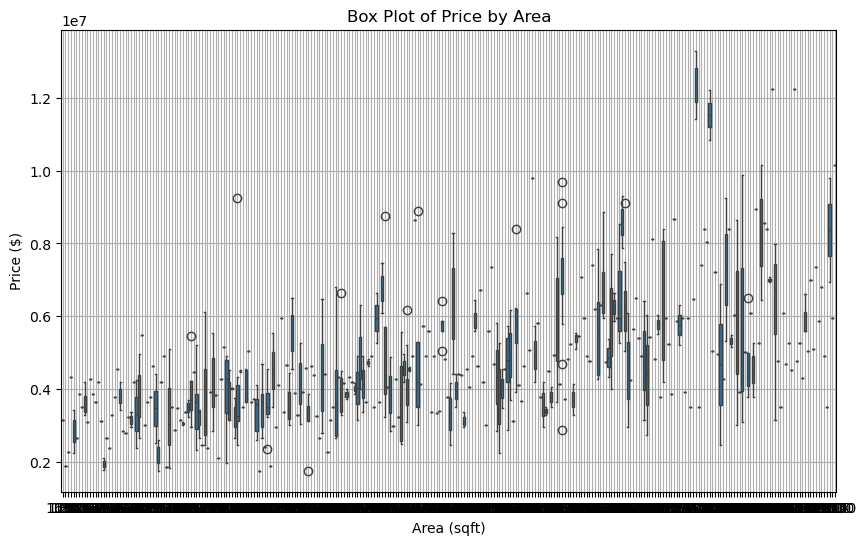

In [22]:
# Box plot of Price by Area
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Price', data=df)
plt.title('Box Plot of Price by Area')
plt.xlabel('Area (sqft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


<Figure size 1000x800 with 0 Axes>

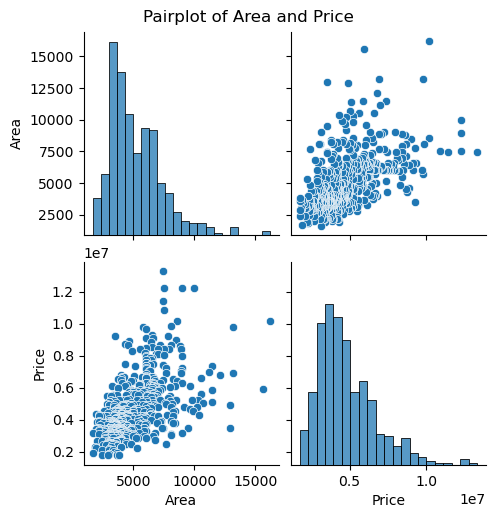

In [23]:
# Pairplot for overall pairwise relationships
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.suptitle('Pairplot of Area and Price', y=1.02)
plt.show()

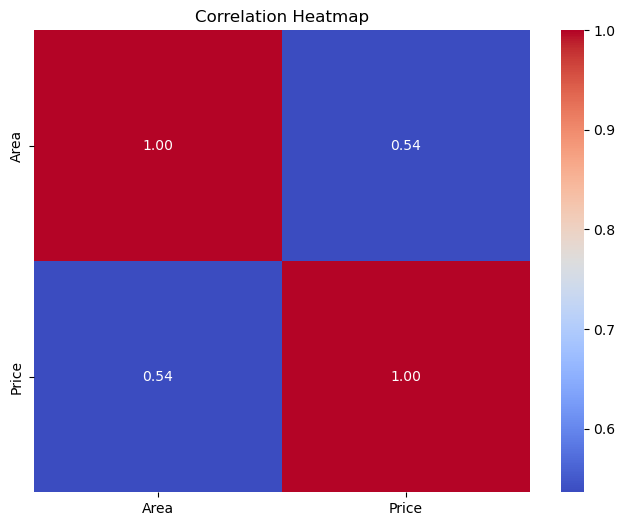

In [24]:
# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Prepare data for training
X = df[['Area']]  # Independent variable
y = df['Price']   # Dependent variable

In [26]:
# Initialize the model
model = LinearRegression()

In [27]:
# Fit the model
model.fit(X, y)

LinearRegression()

In [28]:
with open('area_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)